In [1]:
import pandas as pd
import scipy.stats as st
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import requests
import seaborn as sns

# Задание 1. A/B–тестирование

## 1.1. Разведочный анализ данных (EDA)

### 1.1.1. Общая информация для 'Проект_2_groups.csv' 

#### 1.1.1.1 Загрузка и первичный осмотр данных

In [2]:
#Скачиваем  файл с яндекс диска
def download_new_file(public_url):

    # Формируем специальную ссылку для получения прямой ссылки на скачивание
    download_api_url = "https://cloud-api.yandex.net/v1/disk/public/resources/download"
    params = {"public_key": public_url}
    # Запрашиваем ссылку для скачивания
    response = requests.get(download_api_url, params=params)
    if response.status_code == 200:
        direct_download_url = response.json().get("href")
        return direct_download_url
    else:
        print("Ошибка получения ссылки:", response.text) 

In [3]:
# файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе 
# (А – контроль, B – целевая группа) )
groups = pd.read_csv(download_new_file("https://disk.yandex.ru/d/ivuka7hIJeRhGw"), sep = ";" )



In [17]:
groups.shape

(74484, 2)

In [18]:
groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [130]:
groups.nunique()

id     74484
grp        2
dtype: int64

In [35]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


#### 1.1.1.2. Обработка пропущенных значений (NaN)

In [20]:
groups.isna().sum()

id     0
grp    0
dtype: int64

### 1.1.2. Общая информация для 'Проект_2_group_add.csv'

#### 1.1.2.1. Загрузка и первичный осмотр данных

In [4]:
# дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
group_add = pd.read_csv(download_new_file("https://disk.yandex.ru/d/hTIiejKpOd5ijg"))

In [20]:
group_add.shape

(92, 2)

In [21]:
group_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [129]:
group_add.id.nunique()

92

In [37]:
group_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


#### 1.1.2.2. Обработка пропущенных значений (NaN)

In [40]:
group_add.isna().sum()

id     0
grp    0
dtype: int64

### 1.1.3. Общая информация для 'Проект_2_active_studs.csv' 

#### 1.1.3.1. Загрузка и первичный осмотр данных

In [5]:
# файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента
active_studs = pd.read_csv(download_new_file('https://disk.yandex.ru/d/EAfSVJRDfw9DQA'))

In [23]:
active_studs.shape

(8341, 1)

In [24]:
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [131]:
active_studs.nunique()

student_id    8341
dtype: int64

In [49]:
active_studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


#### 1.1.3.2. Обработка пропущенных значений (NaN)

In [53]:
active_studs.isna().sum()

student_id    0
dtype: int64

### 1.1.4. Общая информация для 'проект_2_checks.csv.csv' 

#### 1.1.4.1. Загрузка и первичный осмотр данных

In [6]:
# файл с информацией об оплатах пользователей в дни проведения эксперимента
checks = pd.read_csv(download_new_file('https://disk.yandex.ru/d/0yzChiYY2xV8Dg'), sep = ";")

In [26]:
checks.shape

(541, 2)

In [27]:
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [132]:
checks.nunique()

student_id    541
rev            39
dtype: int64

In [63]:
checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


In [65]:
checks.rev.describe()

count     541.000000
mean     1059.752317
std       762.712359
min       199.000000
25%       290.000000
50%       840.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64

#### 1.1.4.2. Обработка пропущенных значений (NaN)

In [66]:
checks.isna().sum()

student_id    0
rev           0
dtype: int64

### 1.1.5.Проверка корректности логов, баланса групп

In [6]:
# распределение пользователей по группам А/В в файле groups
groups.groupby('grp', as_index = False).agg(count_grp = ('grp','count'))

,grp,count_grp
0,A,14671
1,B,59813


In [ ]:
# Вывод:баланс в распределение пользователей по группам нарушен и составляет примерно 1/4

In [73]:
# распределение пользователей по группам А/В в файле groups_add
group_add.groupby('grp', as_index = False).agg(count_grp = ('grp','count'))

,grp,count_grp
0,A,22
1,B,70


In [ ]:
# Вывод:баланс в распределение пользователей по группам нарушен и составляет примерно 2/7

In [76]:
#проверка есть ли пересечения между (groups,group_add)
merge_groups_group_add = pd.merge(groups,group_add, how='inner', on = 'id')

In [104]:
# пересечений нет
merge_groups_group_add

,id,grp_x,grp_y


In [12]:
# активные пользователи из группы (groups)
merge_groups_active = pd.merge(groups,active_studs, how = 'inner', left_on = 'id', right_on = 'student_id')

merge_groups_active.groupby('grp', as_index=False).agg(active_group1_count = ('grp', 'count'))

,grp,active_group1_count
0,A,1535
1,B,6793


In [ ]:
# Вывод:баланс в распределение пользователей по группам нарушен и составляет примерно 1/4

In [13]:
# активные пользователи из группы (group_add)
merge_group_add_active = pd.merge(group_add, active_studs, how = 'inner', left_on = 'id', right_on = 'student_id')

merge_group_add_active.groupby('grp', as_index=False).agg(active_group2_count = ('grp', 'count'))

,grp,active_group2_count
0,A,3
1,B,10


In [ ]:
# Вывод:баланс в распределение пользователей по группам нарушен и составляет примерно 1/4

In [ ]:
#вывод: всего активных пользователей 8341: 8328 (1 группа)+ 13 (2 группа)

In [15]:
# пользователи с оплатой в дни эксперимента из активных пользователей
merge_active_checks = pd.merge(active_studs, checks, how = 'inner', on = 'student_id')
merge_active_checks.count()

student_id    392
rev           392
dtype: int64

In [ ]:
# Вывод: не все пользователи с чеками в дни эксперимента есть в файле с активными пользователями в дни эксперимента
# следовательно теряются логи в файле с активными пользователями ИЛИ нек корректен файл с чеками

In [47]:
# пользователи с оплатой в дни эксперимента из всех пользователей

# соединим 2 группы
all_groups = pd.concat([groups, group_add], ignore_index=True)

# все пользователи с оплатами (вкл неактивных)
merge_allgroups_checks = pd.merge(all_groups, checks, how = 'inner', right_on = 'student_id', left_on = 'id')

In [8]:
merge_allgroups_checks.groupby('grp', as_index=False).agg(active_group2_count = ('grp', 'count'))

,grp,active_group2_count
0,A,107
1,B,434


In [ ]:
#Вывод: проверили соотношение оплаченных чеков для активных пользователей и для всех пользователей по группам АБ
#оно равно 1/4, следовательно потеря логов в файле Активных пользователей идет равномерно 
#(теряются и платящие и не платящие клиенты) следовательно сохраняется возможность анализировать данные, которые 
#есть в наличие и параллельно сообщить  о проблеме потери логов 

In [16]:
# пользователи с оплатой в дни эксперимента из активных пользователей группы groups
merge_active_groups_checks = pd.merge(merge_groups_active, checks, how = 'inner', on = 'student_id')

merge_active_groups_checks.groupby('grp', as_index = False).agg(count_checks_active_group1 = ('grp','count'))

,grp,count_checks_active_group1
0,A,78
1,B,313


In [ ]:
# Вывод:баланс в распределение пользователей по группам нарушен и составляет примерно 1/4

In [17]:
# пользователи с оплатой в дни эксперимента из активных пользователей  группы group_add
merge_active_groupadd_checks = pd.merge(merge_group_add_active, checks, how = 'inner', on = 'student_id')

merge_active_groupadd_checks

,id,grp,student_id,rev
0,5740903,B,5740903,1900.0


In [9]:
# активные пользователя по группам (group_add groups)
merge_allgroups_active = pd.merge (all_groups, active_studs, how = 'inner', left_on = 'id', right_on = 'student_id')

merge_allgroups_active.groupby('grp', as_index = False).agg(active_count = ('grp','count'))

,grp,active_count
0,A,1538
1,B,6803


In [ ]:
# Вывод:баланс в распределение пользователей по группам нарушен и составляет примерно 1/4

In [11]:
# активные пользователи с оплатами по группам (group_add groups)
merge_active_checks = pd.merge(merge_allgroups_active, checks, how = 'inner', on = 'student_id')

merge_active_checks.groupby('grp', as_index = False).agg(active_count = ('grp','count'))

,grp,active_count
0,A,78
1,B,314


In [ ]:
# Вывод:баланс в распределение пользователей по группам нарушен и составляет примерно 1/4

### Вывод по п. 1.1.5.: 
- Выявлена некорректрость логов:
Оплату в дни эксперимента провели 541 пользователя, из них только 392 пользователя есть в файле активных пользователей, следовательно идет потеря логов в файле ('Проект_2_active_studs.csv'), стоит уточнить механизм сбора логов и устранить проблемы для корректного проведения А/В тестирования.

Решение: сообщим о проблеме потери логов + также выявили, что соотношение платящих пользователей к активным И платящих пользователей ко всем из групп АБ примерно одинаково и равно 1/4, следовательно логи теряются равномерно (и платящих клиентов и не платящих), следовательно продолжаем анализ имеющихся данных.

- Баланс в распределение пользователей по группам А/Б нарушен и составляет примерно 1/4

Решение: для сравнения групп будет применять t-тест Уэлча 


### 1.1.6. Подготовка датасета для анализа

In [7]:
# все активные пользователи в дни эксперимента с оплатами и без

# соединим 2 группы
all_groups = pd.concat([groups, group_add], ignore_index=True)

# активные пользователя по группам (group_add groups)
merge_allgroups_active = pd.merge (all_groups, active_studs, how = 'inner', left_on = 'id', right_on = 'student_id')

all_active_users = pd.merge(merge_allgroups_active, checks, how = 'left', on = 'student_id').fillna(0)

In [8]:
all_active_users = all_active_users.drop('student_id', axis = 1)

In [9]:
all_active_users['is_paying'] = all_active_users['rev']>0

In [10]:
all_active_users.groupby(['grp','is_paying'], as_index = False).agg(count = ('grp','count'))

,grp,is_paying,count
0,A,False,1460
1,A,True,78
2,B,False,6489
3,B,True,314


In [11]:
all_active_users.groupby(['grp','is_paying'], as_index = False).agg(count = ('rev','sum'))

,grp,is_paying,count
0,A,False,0.0000
1,A,True,72820.0000
2,B,False,0.0000
3,B,True,394974.0035


In [81]:
# все  пользователи с оплатами и без (второй датасет)
all_users = pd.merge(all_groups,checks, how = 'left', left_on = 'id', right_on = 'student_id').fillna(0)
all_users = all_users.drop('student_id', axis = 1)
all_users['is_paying'] = all_users['rev']>0
all_users.groupby(['grp','is_paying'], as_index = False).agg(count = ('id','count'))
all_users

,id,grp,rev,is_paying
0,1489,B,0.0,False
1,1627,A,990.0,True
2,1768,B,0.0,False
3,1783,B,0.0,False
4,1794,A,0.0,False
...,...,...,...,...
74571,200247820,B,0.0,False
74572,201032527,B,0.0,False
74573,201067612,B,0.0,False
74574,201067653,B,0.0,False


## Вывод по п.1.1. (повтор вывода из п. 1.1.5.):
    -Выявлена некорректрость логов: Оплату в дни эксперимента провели 541 пользователя, из них только 392 пользователя
есть в файле активных пользователей, следовательно идет потеря логов в файле ('Проект2active_studs.csv'), 
стоит уточнить механизм сбора логов и устранить проблемы для корректного проведения А/В тестирования.
    
Решение: сообщим о проблеме потери логов + также выявили, что соотношение платящих пользователей к активным И 
платящих пользователей ко всем из групп АБ примерно одинаково и равно 1/4, следовательно логи теряются равномерно 
(и платящих клиентов и не платящих), следовательно продолжаем анализ имеющихся данных.

    -Баланс в распределение пользователей по группам А/Б нарушен и составляет примерно 1/4

Решение: для сравнения групп будет применять t-тест Уэлча

## 1.2. Анализ метрик

В качетсвет метрик выбраны:

**ARPU**               (ttest Уэлча)

**ARPPU**              (ttest Уэлча)

**Конверсия в оплату** (χ²-тест на независимость)

Для ARPU и ARPPU выбран метод **ttest Уэлча**, перед ним не провожу тест на нормальность и дисперсию, аргументирую свою позицию:


(Не провожу тест на нормальность - почему:\
2 наши выборки > 30, соответственно они попадают под ЦПТ, которая гласит, что если выборка >30, то ее выборочные средние распределятся нормальным образом (если мы возьмем из выборки 100 выборок, найдем их среднее, то они распределятся нормальным образом по ЦПТ).
по ссылкам:\
1)Лекция из курса
(https://lab.karpov.courses/learning/622/module/5143/lesson/42073/115617/551293/)
"Считается, что для малых размеров выборок (обычно называют число 30) нормальность данных достаточно критична для t-теста. Однако для таких масштабов, с которыми работает индустрия, это не особо важно: основой t-теста является ЦПТ, а она работает даже с ненормальными ГС - главное собрать выборку побольше. К тому же встретить нормальные данные в реальной жизни практически невозможно."\
2)Статья 
(https://docs.google.com/document/d/1Nbzp0-368G7iGw7eKg6RZQGWNeHh_lU_6u0CvXCgVuY/edit?tab=t.0)
тут вся статья про то, что для ttestов не нужны норм распределения\
Итог: проанализировав данный материал, приняла решение не проводить тест на нормальность


Не провожу тест на дисперсию - почему:\
1)согласно данной лекции (https://lab.karpov.courses/learning/622/module/5143/lesson/42073/115617/670318/) "Более того, нет ничего дурного в том, чтобы использовать t-тест Уэлча (с поправкой на неравенство дисперсий) по умолчанию - в большинстве случаев хуже не будет, а лучше стать может." - в связи с этим взяла сразу именно ттест Уэлча, а не просто ттест, который примет во внимание разность дисперсий, если она уже есть\
2)согласно статьи (https://docs.google.com/document/d/1Nbzp0-368G7iGw7eKg6RZQGWNeHh_lU_6u0CvXCgVuY/edit?tab=t.0#heading=h.wgnpjs2okfm2) "Но все же, тест Уэлча отдает вполне релевантные результаты, и можно по дефолту использовать его в независимости от размеров выборок и дисперсий (это лучше, чем вначале делать тест на гомогенность для выборка между критериями Сьюдента и Уэлча)." - в связи с этим не делала проверку на гомогенность, а сразу взяла Уэлча, тк баланс разный в группах\
3)согласно статьи(https://habr.com/ru/companies/X5Tech/articles/896182/) "preliminary test'ы для определения "Welch или не Welch?" не нужны не использовать Welch's test по дефолту: Имейте основания считать, что дисперсия изменится (например, у вас разные группы в A/B, и само это различие и есть то, что тестируется) в случае, если у вас разный сплит или/и малые выборки." - в связи с этим не проводила preliminary test, а сразу взяла Уэлча только из-за того, что выборки разных размеров\
Итог: проанализировав данный материал, приняла решение не проводить тест на дисперсию, а сразу взяла тест Уэлча, тк размер выборок отличается в 4 раза)

In [12]:
# Группа А
group_a = all_active_users[all_active_users['grp'] == 'A']
group_a

,id,grp,rev,is_paying
0,1627,A,990.0,True
3,3391,A,0.0,False
13,109623,A,0.0,False
15,133678,A,0.0,False
23,175944,A,0.0,False
...,...,...,...,...
8319,5668989,A,0.0,False
8327,5690284,A,0.0,False
8329,5723133,A,0.0,False
8332,5729371,A,0.0,False


In [13]:
# Группа Б
group_b = all_active_users[all_active_users['grp'] == 'B']
group_b

,id,grp,rev,is_paying
1,2085,B,0.0,False
2,2215,B,0.0,False
4,3401,B,0.0,False
5,22994,B,0.0,False
6,26899,B,0.0,False
...,...,...,...,...
8335,5740903,B,1900.0,True
8336,5760471,B,0.0,False
8337,5777081,B,0.0,False
8339,5945085,B,0.0,False


### 1.2.1. ARPU 
(Средний доход на пользователя = (общий доход в группе) / (все активные пользователи))

#### 1.2.1.1 Расчет ARPU по группам 

In [14]:
revenue_a = group_a['rev'].sum()

In [15]:
revenue_a

72820.0

In [16]:
users_a = len(group_a)

In [17]:
users_a

1538

In [18]:
arpu_a = revenue_a/users_a

In [19]:
arpu_a

47.34720416124838

In [20]:
revenue_b = group_b['rev'].sum()

In [21]:
revenue_b

394974.00350000005

In [22]:
users_b = len(group_b)

In [23]:
users_b

6803

In [24]:
arpu_b = revenue_b/users_b

In [25]:
arpu_b

58.058798103777754

In [ ]:
# Вывод: в средних сзачениях ARPU по группам есть разница

#### 1.2.1.2. Расчет стат значимости различий ARPU по группам 
Тк n>30 в каждой группе, следовтельно ЦПТ уже будет работать, а значит мы можем использовать ttest

Тк группы А/Б различаются в размерах в 4 раза (существенно), то применяем ttest Уэлча для проверки стат значимости различий по метрикам, тест на дисперсию не провожу, тк достаточно условия о значимых различиях при сплитовании групп


Н0 = Средний ARPU в группах A и B равен

Н1 = Средний ARPU в группах A и B не равен

In [26]:
group_a['rev']

0       990.0
3         0.0
13        0.0
15        0.0
23        0.0
        ...  
8319      0.0
8327      0.0
8329      0.0
8332      0.0
8338      0.0
Name: rev, Length: 1538, dtype: float64

In [27]:
group_b['rev']

1          0.0
2          0.0
4          0.0
5          0.0
6          0.0
         ...  
8335    1900.0
8336       0.0
8337       0.0
8339       0.0
8340       0.0
Name: rev, Length: 6803, dtype: float64

In [29]:
st.ttest_ind(group_a['rev'], group_b['rev'], equal_var=False)

Ttest_indResult(statistic=-1.286373849379703, pvalue=0.19843583641451018)

#### Вывод по п.1.2.1.2.: p-value > 0.05 -> различия не стат значимые -> H0 не отклоняем

#### 1.2.1.3. Визуализация ARPU  

Text(0, 0.5, 'ARPU')

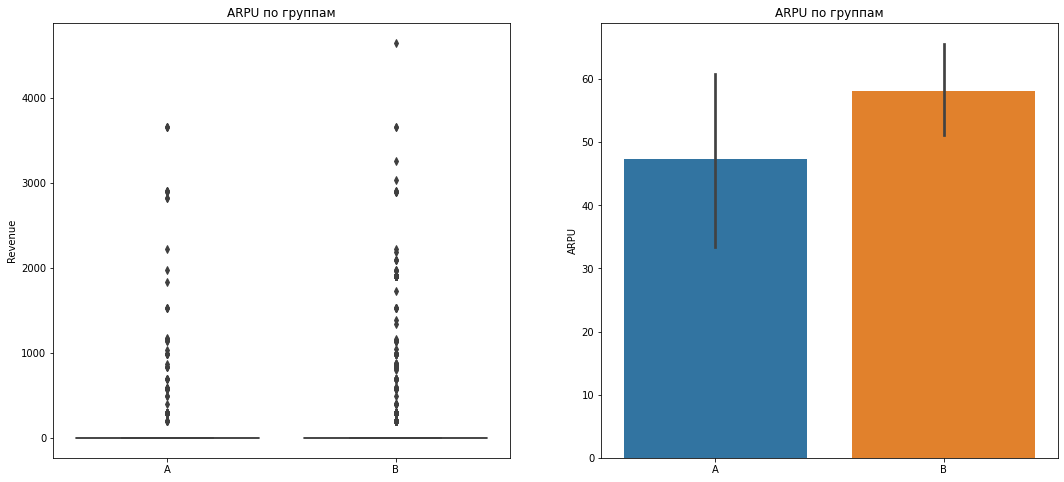

In [109]:
plt.figure(figsize=(18, 8)) 
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(data = all_active_users, x = 'grp', y = 'rev', palette=['#1f77b4', '#ff7f0e'])
plt.title('ARPU по группам')
plt.xlabel('')
plt.ylabel('Revenue')
plt.subplot(1, 2, 2)

ax2 = sns.barplot(x='grp', y='rev', data=all_active_users)
plt.title('ARPU по группам')
plt.xlabel('')
plt.ylabel('ARPU')
#plt.show()

### 1.2.2. Конверсия в оплату 
(Как часто пользователи платят = (число платящих пользователей) / (все активные пользователи))

#### 1.2.2.1 Расчет Конверсии в оплату по группам 

In [57]:
group_a

,id,grp,rev,is_paying
0,1627,A,990.0,True
3,3391,A,0.0,False
13,109623,A,0.0,False
15,133678,A,0.0,False
23,175944,A,0.0,False
...,...,...,...,...
8319,5668989,A,0.0,False
8327,5690284,A,0.0,False
8329,5723133,A,0.0,False
8332,5729371,A,0.0,False


In [31]:
paying_users_a = group_a.query('is_paying==True')['is_paying'].count()

In [32]:
paying_users_a

78

In [56]:
cr_a = paying_users_a/users_a

In [167]:
cr_a

0.05071521456436931

In [36]:
paying_users_b = group_b[group_b['is_paying']==True]['is_paying'].count()

In [55]:
paying_users_b

314

In [57]:
cr_b = paying_users_b/users_b

In [62]:
cr_b

0.046156107599588415

In [ ]:
# Вывод: в средних сзачениях конверсий в оплату по группам есть разница, при этом в группе А конверсия больше

#### 1.2.2.2. Расчет стат значимости различий Конверсии в оплату по группам 

Тк метрика долей, то используем χ²-тест на независимость, проводимый по таблице сопряженности


Н0 = Конверсия в оплату в группах A и B равна

Н1 = Конверсия в оплату в группах A и B  не равна

In [58]:
all_active_users

,id,grp,rev,is_paying
0,1627,A,990.0,True
1,2085,B,0.0,False
2,2215,B,0.0,False
3,3391,A,0.0,False
4,3401,B,0.0,False
...,...,...,...,...
8336,5760471,B,0.0,False
8337,5777081,B,0.0,False
8338,5870856,A,0.0,False
8339,5945085,B,0.0,False


In [61]:
all_active_users_table_short = all_active_users.groupby(['grp','is_paying'], as_index = False).agg(count = ('grp','count'))

In [62]:
all_active_users_table_short

,grp,is_paying,count
0,A,False,1460
1,A,True,78
2,B,False,6489
3,B,True,314


In [66]:
contingency_table = all_active_users_table_short.pivot(index='grp',columns='is_paying',values='count')
contingency_table

is_paying,False,True
grp,,
A,1460,78
B,6489,314


In [67]:
result = chi2_contingency(contingency_table)

In [68]:
result

(0.48480826522557896,
 0.48625240457231045,
 1,
 array([[1465.71897854,   72.28102146],
        [6483.28102146,  319.71897854]]))

#### Вывод по п. 1.2.2.2. : p-value = 0.486, p-value > 0.05 -> результат не стат значим -> Н0 не отклоняем

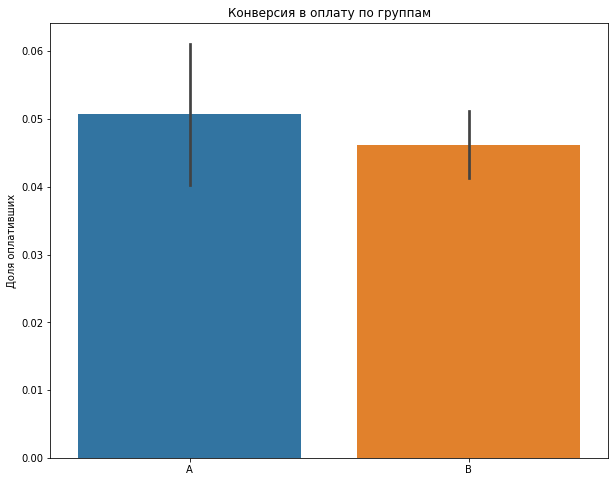

In [99]:
plt.figure(figsize=(10, 8)) 
sns.barplot(x='grp', y='is_paying', data=all_active_users)
plt.title('Конверсия в оплату по группам')
plt.xlabel('')
plt.ylabel('Доля оплативших')
#plt.xticks(rotation=45)
plt.show()

### 1.2.3. ARPPU
(Средний чек = (общий доход в группе) / (число платящих пользователей))

#### 1.2.3.1 Расчет ARPPU по группам 

In [33]:
arppu_a = revenue_a/paying_users_a

In [34]:
arppu_a

933.5897435897435

In [37]:
arppu_b = revenue_b/paying_users_b

In [61]:
arppu_b

1257.8789920382167

In [ ]:
# Вывод: в средних сзачениях ARPPU по группам есть разница

#### 1.2.3.2. Расчет стат значимости различий ARPPU по группам 
Тк n>30 в каждой группе, то используем ttest

Тк группы А/Б различаются в размерах, то применяем ttest Уэлча для проверки стат значимости различий по метрикам

In [ ]:
Н0 = средний ARPPU в группах A и B равен
Н1 = средний ARPPU в группах A и B не равен

In [162]:
group_a.query('is_paying == True')['rev']

0        990.0
319     1830.0
448     2910.0
508     2820.0
718     3660.0
         ...  
8142     990.0
8257    1160.0
8265     290.0
8275     489.0
8281     590.0
Name: rev, Length: 78, dtype: float64

In [163]:
group_b.query('is_paying == True')['rev']

10       990.0000
12       290.0000
246     1900.0001
279      690.0000
299      199.0000
          ...    
8312    1900.0000
8314    1900.0000
8316    1900.0000
8323    1900.0000
8335    1900.0000
Name: rev, Length: 314, dtype: float64

In [164]:
st.ttest_ind(group_a.query('is_paying == True')['rev'], group_b.query('is_paying == True')['rev'], equal_var=False)

Ttest_indResult(statistic=-2.861689755269415, pvalue=0.005069734012800116)

#### Вывод по п.1.2.3.2.: p-value < 0.05 -> различия стат значимые -> H0 отклоняем

#### 1.2.1.3. Визуализация ARPPU  

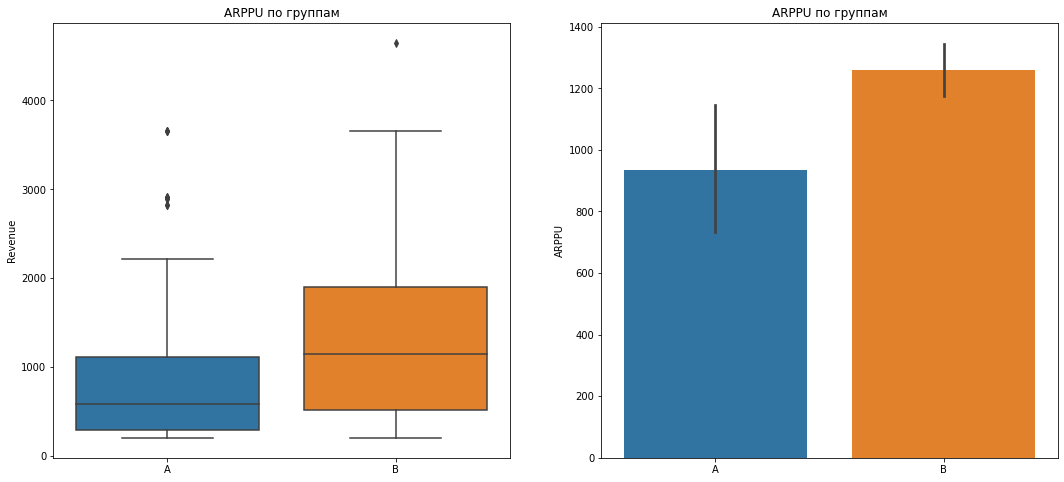

In [113]:
plt.figure(figsize=(18, 8)) 
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(data = all_active_users.query('is_paying == True'), x = 'grp', y = 'rev')
plt.title('ARPPU по группам')
plt.xlabel('')
plt.ylabel('Revenue')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='grp', y='rev', data=all_active_users.query('is_paying == True'))
plt.title('ARPPU по группам')
plt.xlabel('')
plt.ylabel('ARPPU')
#plt.xticks(rotation=45)
plt.show()

## Вывод из п.1.2:

2 метрики (Конверсия в оплату, ARPU) из 3 (Конверсия в оплату, ARPU, ARPPU) дали не стат значимые различия в показателях, на основании этих данных отклоняем принятие новой механики оплаты


# Итоги по Заданию 1:

1) В ходе проведения анализа была замечена потеря логов в файле "Проект_2_active_studs.csv", необходимо найти причины и устранить, после имеет смысл провести посторный А/Б тест

2)При анализе существующих данных метрики ARPU И ARPUU показали лучшие результаты по средним значениям в группе Б, однако при проверки результатов на стат значимость, только одна метрика ARPPU показала значимость различий. Одновременно с этим ключевая метрика Конверсии в оплату показала при сравнение средних худший результат у группы Б

Исходя из пунктов выше сделан вывод о том, что внеднять новую механику оплаты не стоит.

# Задание 2. 

## 2.1. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv 
(заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

In [53]:
import pandas as pd
import scipy.stats as st
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [54]:
#загружаем файлы первичные
groups = pd.read_csv('Проект_2_groups.csv', sep = ";" )
group_add = pd.read_csv('Проект_2_group_add.csv')
active_studs = pd.read_csv('Проект_2_active_studs.csv')
checks = pd.read_csv('Проект_2_checks.csv', sep = ";")

In [55]:
# собираем датасет по активным пользовтелям

# соединили 2 группы groups и group_add
all_groups = pd.concat([groups, group_add], ignore_index=True)
# выбрали всех активных пользователей
merge_allgroups_active = pd.merge (all_groups, active_studs, how = 'inner', left_on = 'id', right_on = 'student_id')
# к активным добавили оплаты
all_active_users = pd.merge(merge_allgroups_active, checks, how = 'left', on = 'student_id').fillna(0)
all_active_users['is_paying'] = all_active_users['rev']>0


In [38]:
# собираем датасет по всем пользовтелям

all_users = pd.merge(all_groups,checks, how = 'left', left_on = 'id', right_on = 'student_id').fillna(0)
all_users = all_users.drop('student_id', axis = 1)
all_users['is_paying'] = all_users['rev']>0


In [74]:
# функции подсчета метрик по изначальным данным

def F_ARPU(all_active_users):
    try:
        group_a = all_active_users[all_active_users['grp'] == 'A']
        arpu_a = group_a['rev'].sum()/len(group_a)
        print(f"ARPU группы A: {arpu_a} ")
        
        group_b = all_active_users[all_active_users['grp'] == 'B']
        arpu_b = group_b['rev'].sum()/len(group_b)
        print(f"ARPU группы Б: {arpu_b}")
        
        stat_result_ARPU = st.ttest_ind(group_a['rev'], group_b['rev'], equal_var=False)
        print (f"T-test Уэлча по ARPAU: {stat_result_ARPU} \n")
        
    
    except Exception as e:
        # Если произошла ЛЮБАЯ ошибка - выполняется этот блок
        print(f"Ошибка подсчета ARPU.")
        #return all_active_users 
        
        
def F_ARPPU(all_active_users):
    try:
        group_a = all_active_users[all_active_users['grp'] == 'A']
        arppu_a = group_a['rev'].sum()/group_a.query('is_paying==True')['is_paying'].count()
        print(f"ARPPU группы A: {arppu_a} ")
        
        group_b = all_active_users[all_active_users['grp'] == 'B']
        arppu_b = group_b['rev'].sum()/group_b.query('is_paying==True')['is_paying'].count()
        print(f"ARPPU группы Б: {arppu_b}")
        
        stat_result_ARPPU = st.ttest_ind(group_a.query('is_paying == True')['rev'], group_b.query('is_paying == True')['rev'], equal_var=False)
        print (f"T-test Уэлча по ARPPU: {stat_result_ARPPU} \n")
        
    
    except Exception as e:
        # Если произошла ЛЮБАЯ ошибка - выполняется этот блок
        print(f"Ошибка подсчета ARPPU.")
        #return all_active_users 
        

def F_CR(all_active_users):
    
    try:
        group_a = all_active_users[all_active_users['grp'] == 'A']
        cr_a = group_a.query('is_paying==True')['is_paying'].count()/len(group_a)
        print(f"CR группы A: {cr_a} ")
        
        group_b = all_active_users[all_active_users['grp'] == 'B']
        cr_b = group_b.query('is_paying==True')['is_paying'].count()/len(group_b)
        print(f"CR группы Б: {cr_b}")
        
        all_active_users_table_short = all_active_users.groupby(['grp','is_paying'], as_index = False).agg(count = ('grp','count'))
        contingency_table = all_active_users_table_short.pivot(index='grp',columns='is_paying',values='count')
        result_st, result_pvalue,result3, result4 = chi2_contingency(contingency_table)
        print (f"χ²-test по СR: \n   statistic :{result_st} \n   pvalue: {result_pvalue} \n")
    
    except Exception as e:
        # Если произошла ЛЮБАЯ ошибка - выполняется этот блок
        print(f"Ошибка подсчета CR в оплату.")
        #return all_active_users 

def F_CR_all_users(all_users):
    
    try:
        group_a = all_users[all_users['grp'] == 'A']
        cr_all_users_a = group_a.query('is_paying==True')['is_paying'].count()/len(group_a)
        print(f"CR_all_users группы A: {cr_all_users_a} ")
        
        group_b = all_users[all_users['grp'] == 'B']
        cr_all_users_b = group_b.query('is_paying==True')['is_paying'].count()/len(group_b)
        print(f"CR_all_users группы Б: {cr_all_users_b}")
        
        all_users_table_short = all_users.groupby(['grp','is_paying'], as_index = False).agg(count = ('grp','count'))
        contingency_table = all_users_table_short.pivot(index='grp',columns='is_paying',values='count')
        result_st, result_pvalue,result3, result4 = chi2_contingency(contingency_table)
        print (f"χ²-test по СR_all_users: \n   statistic :{result_st} \n   pvalue: {result_pvalue} \n")
        #print(all_users_table_short)
    
    except Exception as e:
        # Если произошла ЛЮБАЯ ошибка - выполняется этот блок
        print(f"Ошибка подсчета CR_all_users в оплату.")
        #return all_active_users
  

F_CR_all_users(all_users)       
F_CR(all_active_users)
F_ARPPU (all_active_users)
F_ARPU (all_active_users)

CR_all_users группы A: 0.0072823793643231475 
CR_all_users группы Б: 0.007247465891822387
χ²-test по СR_all_users: 
   statistic :0.0 
   pvalue: 1.0 

CR группы A: 0.05071521456436931 
CR группы Б: 0.046156107599588415
χ²-test по СR: 
   statistic :0.48480826522557896 
   pvalue: 0.48625240457231045 

ARPPU группы A: 933.5897435897435 
ARPPU группы Б: 1257.8789920382167
T-test Уэлча по ARPPU: Ttest_indResult(statistic=-2.861689755269415, pvalue=0.005069734012800116) 

ARPU группы A: 47.34720416124838 
ARPU группы Б: 58.058798103777754
T-test Уэлча по ARPAU: Ttest_indResult(statistic=-1.286373849379703, pvalue=0.19843583641451018) 



In [34]:
#Скачиваем новый файл с яндекс диска

def download_new_file(public_url):

    # Формируем специальную ссылку для получения прямой ссылки на скачивание
    download_api_url = "https://cloud-api.yandex.net/v1/disk/public/resources/download"
    params = {"public_key": public_url}
    # Запрашиваем ссылку для скачивания
    response = requests.get(download_api_url, params=params)

    if response.status_code == 200:
        direct_download_url = response.json().get("href")
        # Скачиваем файл и читаем его прямо в датафрейм
        new_columns_names = ['id', 'grp']
        new_file = pd.read_csv(direct_download_url, names = new_columns_names, header = 0)
        #print(new_file.head())
        return new_file
    else:
        print("Ошибка получения ссылки:", response.text)
    
    
download_new_file("https://disk.yandex.ru/d/sNPpohSA23mE5A")

,id,grp
0,1001,B
1,1002,B
2,1003,A
3,1004,B
4,1005,A
5,1006,B
6,1007,A
7,1008,A
8,1,A
9,2,B


In [73]:

# функция подкачивает доп файл с публичной ссылки на яндекс диске и пересчитывает метрики

# важный момент: подкачивается файл только с группами, при этом активные пользователи остаются прежними, 
# а они у нас все исчерпались файлами ( 'Проект_2_groups.csv' 'Проект_2_active_studs.csv' ) поэтому 
# фактически наши метрики 
# ARPU  (Средний доход на пользователя = (общий доход в группе) / (все активные пользователи))
# ARPPU (Средний чек = (общий доход в группе) / (число платящих пользователей))
# CR    (Средний доход на пользователя = (общий доход в группе) / (все активные пользователи)) 
# меняться не будут при подкачки данного файла

#CR_all_users (Средний доход на пользователя = (общий доход в группе) / (все пользователи)) - меняться будет

def additional_file(all_active_users, new_file):
    try:
        #print(new_file)
        if 'id' not in all_active_users.columns or 'id' not in new_file.columns:
            raise ValueError("Столбец 'id' отсутствует в одном из DataFrame")
            
            
        #create_active_user_dataset(groups,group_add,active_studs,checks) 
        #create_all_user_dataset(groups,group_add,active_studs,checks)
        #print(new_file)
        #print(all_groups)
        all_groups = pd.concat([groups, group_add], ignore_index=True)
        all_groups = pd.concat([all_groups, new_file], ignore_index=True)
        merge_allgroups_active = pd.merge (all_groups, active_studs, how = 'inner', left_on = 'id', right_on = 'student_id')
        all_active_users = pd.merge(merge_allgroups_active, checks, how = 'left', on = 'student_id').fillna(0)
        all_active_users['is_paying'] = all_active_users['rev']>0
        

        all_users = pd.merge(all_groups,checks, how = 'left', left_on = 'id', right_on = 'student_id').fillna(0)
        all_users = all_users.drop('student_id', axis = 1)
        all_users['is_paying'] = all_users['rev']>0
        
  
        #new_all_active_users = pd.merge(all_active_users, all_groups, how = 'left', on = ['id','grp'] )
        #new_all_users = pd.merge(all_users, all_groups, how = 'left', on = ['id','grp'] )
        
        F_ARPU (all_active_users)
        F_ARPPU (all_active_users)
        F_CR(all_active_users)
        F_CR_all_users(all_users)
        

    
    
    except FileNotFoundError:
        print(f"Ошибка: файл {new_file} не найден")
        return all_active_users  # Возвращаем исходные данные
    except pd.errors.EmptyDataError:
        print(f"Ошибка: файл {new_file} пуст")
        return all_active_users
    except Exception as e:
        # Если произошла ЛЮБАЯ ошибка - выполняется этот блок
        print(f"Ошибка подсчета additional_file.")
        
additional_file(all_active_users, download_new_file("https://disk.yandex.ru/d/sNPpohSA23mE5A"))

ARPU группы A: 47.34720416124838 
ARPU группы Б: 58.058798103777754
T-test Уэлча по ARPAU: Ttest_indResult(statistic=-1.286373849379703, pvalue=0.19843583641451018) 

ARPPU группы A: 933.5897435897435 
ARPPU группы Б: 1257.8789920382167
T-test Уэлча по ARPPU: Ttest_indResult(statistic=-2.861689755269415, pvalue=0.005069734012800116) 

CR группы A: 0.05071521456436931 
CR группы Б: 0.046156107599588415
χ²-test по СR: 
   statistic :0.48480826522557896 
   pvalue: 0.48625240457231045 

CR_all_users группы A: 0.007279902027486733 
CR_all_users группы Б: 0.0072420237618475505
χ²-test по СR_all_users: 
   statistic :0.0 
   pvalue: 1.0 



## 2.2. Реализуйте функцию, которая будет строить графики по получаемым метрикам.

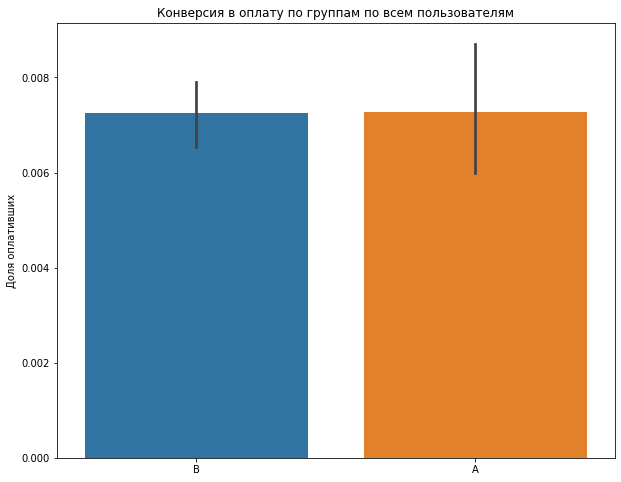

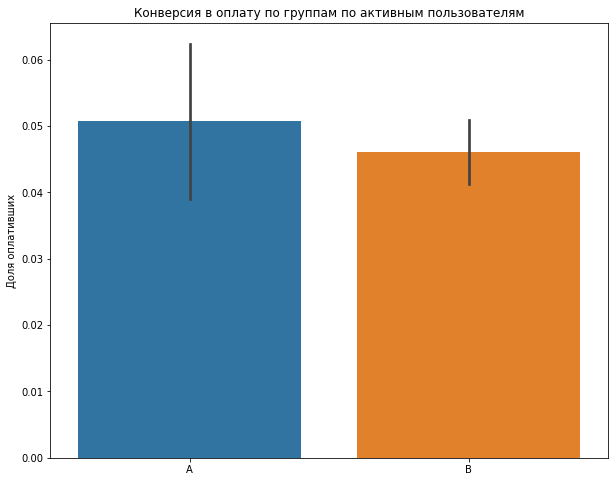

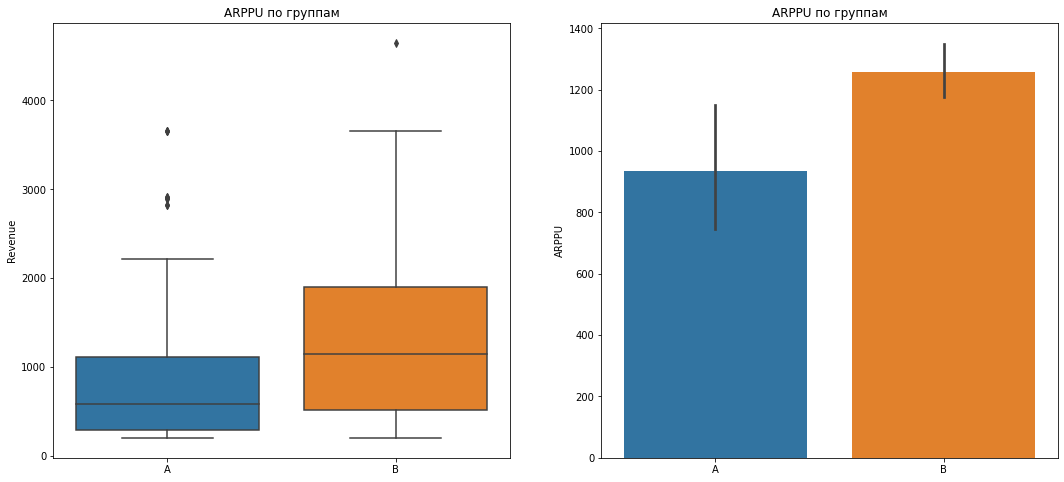

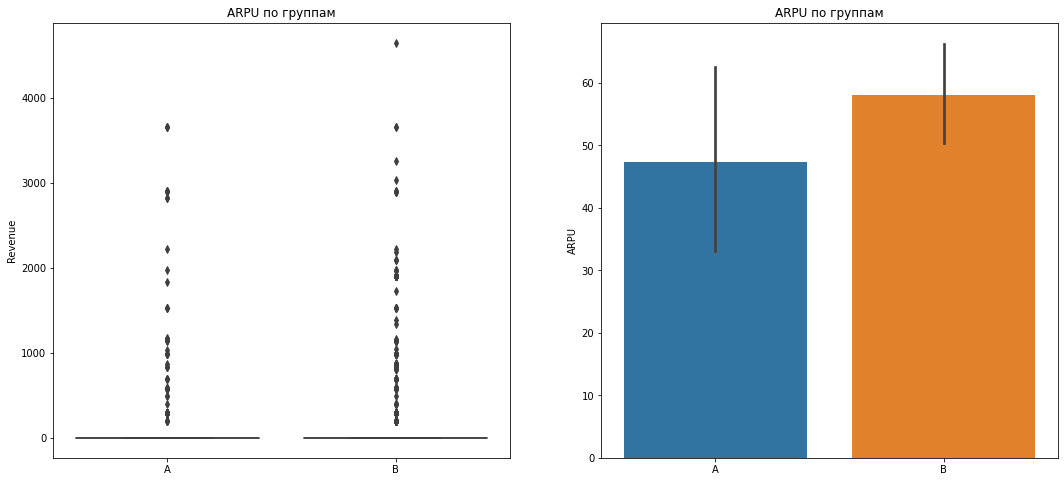

In [67]:
# функции по построению графиков по изначальным данным

def Viz_ARPU(all_active_users):
    
    try:
        plt.figure(figsize=(18, 8)) 
        plt.subplot(1, 2, 1)
        ax1 = sns.boxplot(data = all_active_users, x = 'grp', y = 'rev', palette=['#1f77b4', '#ff7f0e'])
        plt.title('ARPU по группам')
        plt.xlabel('')
        plt.ylabel('Revenue')
        plt.subplot(1, 2, 2)

        ax2 = sns.barplot(x='grp', y='rev', data=all_active_users)
        plt.title('ARPU по группам')
        plt.xlabel('')
        plt.ylabel('ARPU')
        
    except Exception as e:
        # Если произошла ЛЮБАЯ ошибка - выполняется этот блок
        print(f"Ошибка подсчета VIZ_ARPU.")
 

def Viz_ARPPU(all_active_users):
    
    try:
        plt.figure(figsize=(18, 8)) 
        plt.subplot(1, 2, 1)
        ax1 = sns.boxplot(data = all_active_users.query('is_paying == True'), x = 'grp', y = 'rev')
        plt.title('ARPPU по группам')
        plt.xlabel('')
        plt.ylabel('Revenue')

        plt.subplot(1, 2, 2)
        ax2 = sns.barplot(x='grp', y='rev', data=all_active_users.query('is_paying == True'))
        plt.title('ARPPU по группам')
        plt.xlabel('')
        plt.ylabel('ARPPU')
        
    except Exception as e:
        # Если произошла ЛЮБАЯ ошибка - выполняется этот блок
        print(f"Ошибка подсчета VIZ_ARPPU.")
        
def VIZ_CR (all_active_users):
    try:
        plt.figure(figsize=(10, 8)) 
        sns.barplot(x='grp', y='is_paying', data=all_active_users)
        plt.title('Конверсия в оплату по группам по активным пользователям')
        plt.xlabel('')
        plt.ylabel('Доля оплативших')
        #plt.xticks(rotation=45)
        plt.show()
        
    except Exception as e:
        # Если произошла ЛЮБАЯ ошибка - выполняется этот блок
        print(f"Ошибка подсчета VIZ_CR.")
      
def VIZ_CR_all_users (all_users):
    try:
        plt.figure(figsize=(10, 8)) 
        sns.barplot(x='grp', y='is_paying', data=all_users)
        plt.title('Конверсия в оплату по группам по всем пользователям')
        plt.xlabel('')
        plt.ylabel('Доля оплативших')
        #plt.xticks(rotation=45)
        plt.show()
        
    except Exception as e:
        # Если произошла ЛЮБАЯ ошибка - выполняется этот блок
        print(f"Ошибка подсчета VIZ_CR_all_users.")
      
    
    
VIZ_CR_all_users(all_users)  
VIZ_CR(all_active_users)              
Viz_ARPPU(all_active_users)
Viz_ARPU(all_active_users)

ARPU группы A: 47.34720416124838 
ARPU группы Б: 58.058798103777754
T-test Уэлча по ARPAU: Ttest_indResult(statistic=-1.286373849379703, pvalue=0.19843583641451018) 

ARPPU группы A: 933.5897435897435 
ARPPU группы Б: 1257.8789920382167
T-test Уэлча по ARPPU: Ttest_indResult(statistic=-2.861689755269415, pvalue=0.005069734012800116) 

CR группы A: 0.05071521456436931 
CR группы Б: 0.046156107599588415
χ²-test по СR: 
   statistic :0.48480826522557896 
   pvalue: 0.48625240457231045 



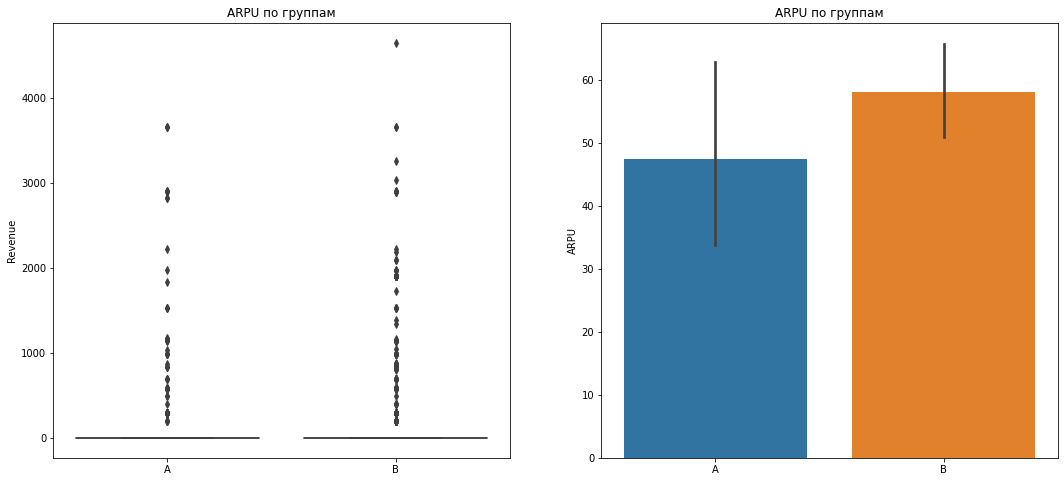

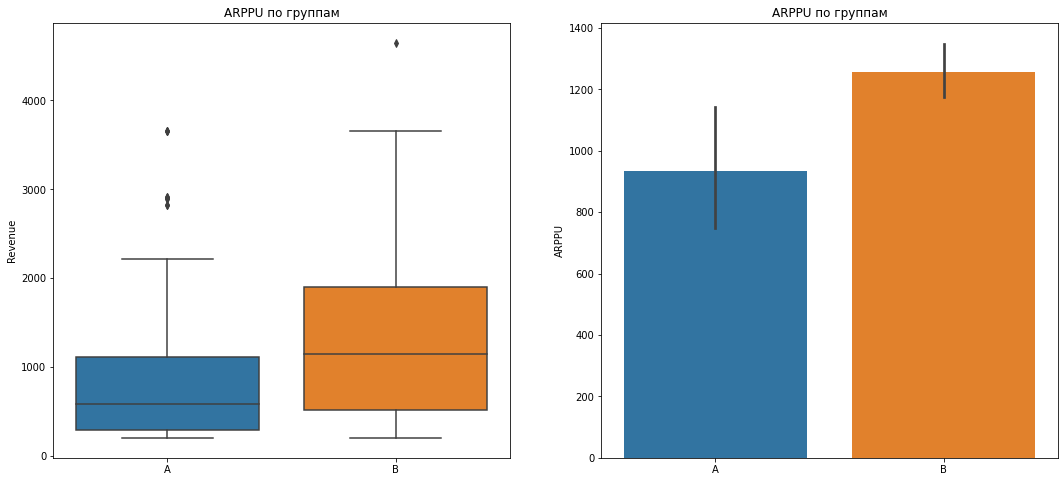

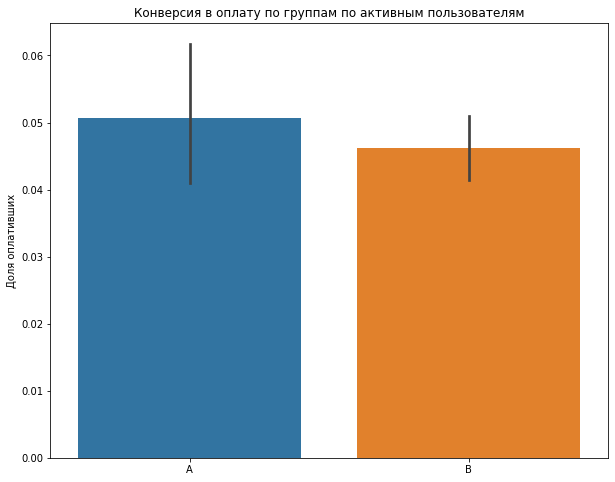

CR_all_users группы A: 0.007279902027486733 
CR_all_users группы Б: 0.0072420237618475505
χ²-test по СR_all_users: 
   statistic :0.0 
   pvalue: 1.0 



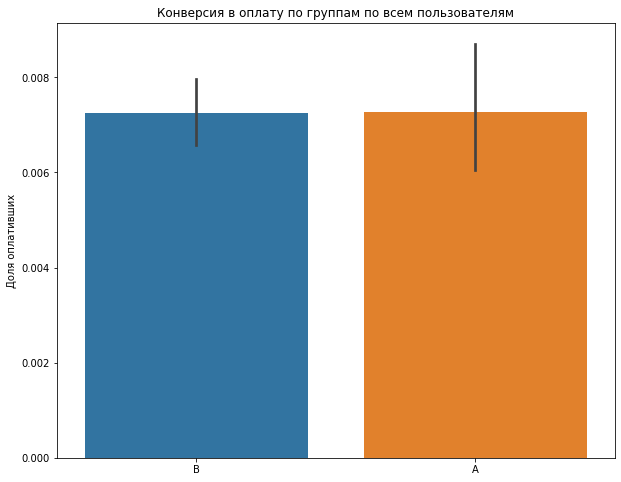

In [75]:
# функция подкачивает доп файл я с публичной ссылки на яндекс диске и перестраивает графики


# важный момент: подкачивается файл только с группами, при этом активные пользователи остаются прежними, 
# а они у нас все исчерпались файлами ( 'Проект_2_groups.csv' 'Проект_2_active_studs.csv' ) поэтому 
# фактически наши метрики и их графики
# ARPU  (Средний доход на пользователя = (общий доход в группе) / (все активные пользователи))
# ARPPU (Средний чек = (общий доход в группе) / (число платящих пользователей))
# CR    (Как часто пользователи платят = (число платящих пользователей) / (все активные пользователи)) 
# меняться не будут при подкачки данного файла

#CR_all_users (Средний доход на пользователя = (общий доход в группе) / (все пользователи)) - меняться будет

def additional_file(all_active_users, new_file):
    try:
        if 'id' not in all_active_users.columns or 'id' not in new_file.columns:
            raise ValueError("Столбец 'id' отсутствует в одном из DataFrame")
        all_groups = pd.concat([groups, group_add], ignore_index=True)
        all_groups = pd.concat([all_groups, new_file], ignore_index=True)
        merge_allgroups_active = pd.merge (all_groups, active_studs, how = 'inner', left_on = 'id', right_on = 'student_id')
        all_active_users = pd.merge(merge_allgroups_active, checks, how = 'left', on = 'student_id').fillna(0)
        all_active_users['is_paying'] = all_active_users['rev']>0
        

        all_users = pd.merge(all_groups,checks, how = 'left', left_on = 'id', right_on = 'student_id').fillna(0)
        all_users = all_users.drop('student_id', axis = 1)
        all_users['is_paying'] = all_users['rev']>0
        
        
        F_ARPU (all_active_users)
        Viz_ARPU(all_active_users)
        
        F_ARPPU (all_active_users)
        Viz_ARPPU(all_active_users)
        
        F_CR(all_active_users)
        VIZ_CR(all_active_users) 
        
        F_CR_all_users(all_users)
        VIZ_CR_all_users(all_users) 
        
        #return new_all_active_users
    
    
    except FileNotFoundError:
        print(f"Ошибка: файл {new_file} не найден")
        return all_active_users  # Возвращаем исходные данные
    except pd.errors.EmptyDataError:
        print(f"Ошибка: файл {new_file} пуст")
        return all_active_users
    except Exception as e:
        # Если произошла ЛЮБАЯ ошибка - выполняется этот блок
        print(f"Ошибка подсчета additional_file.")
        
additional_file(all_active_users, download_new_file("https://disk.yandex.ru/d/sNPpohSA23mE5A"))
        